In [2]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image
import pandas as pd

In [3]:
dataset= r'all3_clf_0.1-3.csv'
data=pd.DataFrame(pd.read_csv(dataset))
data

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,93,94,95,96,97,98,99,100,101,Adsorption energy(ev)
0,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
1,14.000000,9,32,23,6.000000,9,65.142857,2,94,92,...,0,0,0,0,0,0,0,0,0,0
2,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
3,17.714286,3,82,79,18.367347,9,65.000000,1,93,92,...,0,0,0,0,0,0,0,0,0,0
4,20.000000,9,82,73,17.714286,9,65.285714,2,93,91,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,15.428571,9,50,41,9.877551,9,65.142857,2,93,91,...,0,0,0,0,0,0,0,0,0,0
636,12.857143,9,32,23,5.469388,9,65.000000,2,93,91,...,0,0,0,0,0,0,0,0,0,0
637,13.142857,3,50,47,10.530612,9,64.857143,1,93,92,...,0,0,0,0,0,0,0,0,0,0
638,11.714286,3,32,29,7.306122,9,64.857143,1,94,93,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_Data=data.iloc[:,:]
global corMat
corMat = pd.DataFrame(all_Data.corr())  #corr 求相关系数矩阵
corMat.to_csv('heatmap-before.csv')
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plt.savefig('heatmap-before.png', dpi=300, bbox_inches = 'tight')
plt.close()

In [5]:
# 使用随机森林的rfe:RandomForestRegressor()
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np

# 输入数据归一化
X = data.values[:, :-1]
for i in range(X.shape[1]):
    X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
y = data.values[:, -1]  # 目标数值

# rfe步骤
remain_number = 305
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
rfe_X = rfe.fit_transform(X, y)
print("特征是否被选中：\n", rfe.support_)                                          # ndarray
print("获取的数据特征尺寸:", rfe_X.shape)                                           # tuple
list1 = rfe.support_.tolist()

# 打印rfe后的特征，但可能包含空值
import pandas as pd
Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
Features_0
Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
Features_rfe
#     pd.options.display.max_rows=None
p = pd.concat([Features_0, Features_rfe], axis=1)
q = p[p['whether selected']>0]
r = q.reset_index(drop=True)
global s_rfe
s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
global target
target = pd.DataFrame(data=data.iloc[:,-1])
# target = pd.DataFrame(data, columns=['Potential (v)'])
global data_rfe
data_rfe = pd.concat([s_rfe,target], axis=1)
print("最后的特征s_rfe:", r.Features.values)                                        # ndarray
print("目标target:", target)
print("rfe后的总数据data_rfe:", data_rfe)

list2 = r.Features.values.tolist()

# print全输出
with open("data.txt", "w") as f:
    #f.write("特征是否被选中：\n")
    f.write("Whether the feature is selected:\n")
    for i in range(len(list1)):
        f.write(str(list1[i])+' ')
    #f.write("\n获取的数据特征尺寸：\n")
    f.write("\nAcquired data feature size:\n")
    f.write('(%s,%s)' % rfe_X.shape)
    #f.write("\n最后的特征s_rfe：\n")
    f.write("\nS_rfe(Final feature)：\n")
    for i in range(len(list2)):
        f.write(str(list2[i]) + '\n')
target.to_csv("target.csv")
data_rfe.to_csv("data_rfe.csv")

特征是否被选中：
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  Tru

In [6]:
data_rfe

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,93,94,95,96,97,98,99,100,101,Adsorption energy(ev)
0,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
1,14.000000,9,32,23,6.000000,9,65.142857,2,94,92,...,0,0,0,0,0,0,0,0,0,0
2,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
3,17.714286,3,82,79,18.367347,9,65.000000,1,93,92,...,0,0,0,0,0,0,0,0,0,0
4,20.000000,9,82,73,17.714286,9,65.285714,2,93,91,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,15.428571,9,50,41,9.877551,9,65.142857,2,93,91,...,0,0,0,0,0,0,0,0,0,0
636,12.857143,9,32,23,5.469388,9,65.000000,2,93,91,...,0,0,0,0,0,0,0,0,0,0
637,13.142857,3,50,47,10.530612,9,64.857143,1,93,92,...,0,0,0,0,0,0,0,0,0,0
638,11.714286,3,32,29,7.306122,9,64.857143,1,94,93,...,0,0,0,0,0,0,0,0,0,0


In [7]:
s_rfe

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,92,93,94,95,96,97,98,99,100,101
0,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
1,14.000000,9,32,23,6.000000,9,65.142857,2,94,92,...,0,0,0,0,0,0,0,0,0,0
2,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
3,17.714286,3,82,79,18.367347,9,65.000000,1,93,92,...,0,0,0,0,0,0,0,0,0,0
4,20.000000,9,82,73,17.714286,9,65.285714,2,93,91,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,15.428571,9,50,41,9.877551,9,65.142857,2,93,91,...,0,0,0,0,0,0,0,0,0,0
636,12.857143,9,32,23,5.469388,9,65.000000,2,93,91,...,0,0,0,0,0,0,0,0,0,0
637,13.142857,3,50,47,10.530612,9,64.857143,1,93,92,...,0,0,0,0,0,0,0,0,0,0
638,11.714286,3,32,29,7.306122,9,64.857143,1,94,93,...,0,0,0,0,0,0,0,0,0,0


In [8]:
target

,Adsorption energy(ev)
0,0
1,0
2,0
3,0
4,0
...,...
635,0
636,0
637,0
638,0


In [9]:
# Genetic algorithm

In [10]:
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [11]:
feature_names = list(data_rfe.columns[:-1])

In [12]:
# 创建符号分类器
clf = SymbolicClassifier(population_size=100, generations=5, tournament_size=20,
                         stopping_criteria=0.0, const_range=(-1.0, 1.0), function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                        'inv', 'max', 'min', 'sin', 'cos', 'tan'], verbose=1)
clf.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     6.50         0.876814       22         0.631998              N/A      0.13s
   1     6.08          0.74096       11         0.621113              N/A      0.10s
   2     7.48         0.689274       17         0.605203              N/A      0.06s
   3    10.06          0.67881       17         0.605203              N/A      0.03s
   4    11.78         0.679892       17         0.605203              N/A      0.00s


SymbolicClassifier(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                 'abs', 'neg', 'inv', 'max', 'min', 'sin',
                                 'cos', 'tan'],
                   generations=5, population_size=100, verbose=1)

In [13]:
print(set(str(clf._program).split()))

{'tan(X207))))))))))))))', 'neg(sqrt(abs(log(abs(log(neg(sqrt(abs(log(abs(log(sub(sin(X138),'}


Confusion Matrix:
[[92  0]
 [36  0]]


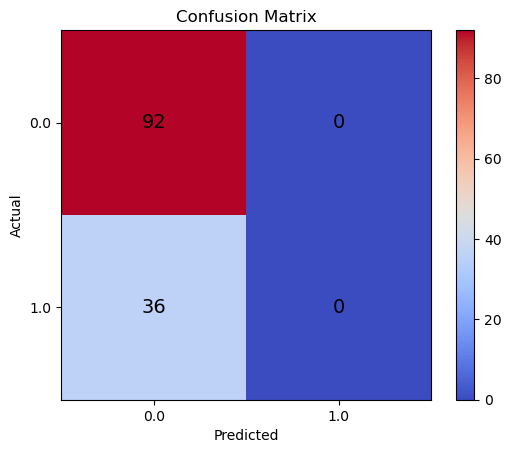

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.savefig('test.png')
plt.show()

Confusion Matrix:
[[353   0]
 [159   0]]


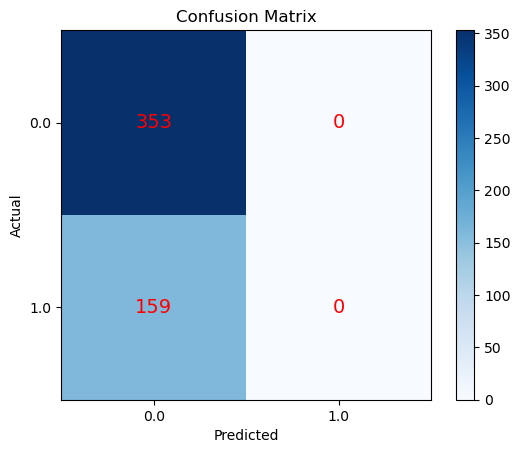

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=14)
plt.savefig('train.png')
plt.show()

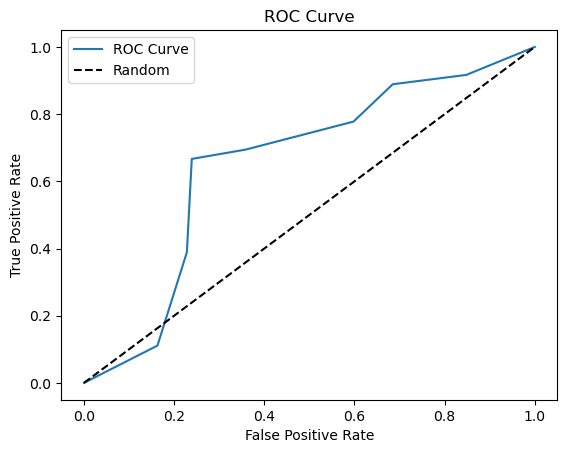

Accuracy: 0.71875


In [16]:
# ROC Curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('test_ROC.png')
plt.show()

# Accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


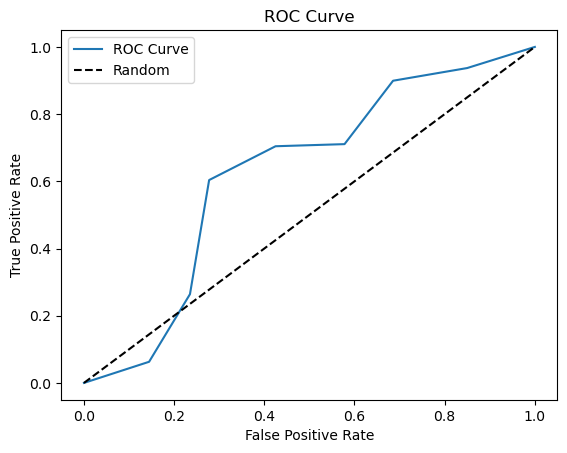

Accuracy: 0.689453125


In [17]:
# ROC Curve
y_probs = clf.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('train_ROC.png')
plt.show()

# Accuracy
accuracy = clf.score(X_train, y_train)
print("Accuracy:", accuracy)


In [18]:
import pickle

# 保存训练好的模型
with open('symbol_classification_delete.pkl', 'wb') as file:
    pickle.dump(clf, file)

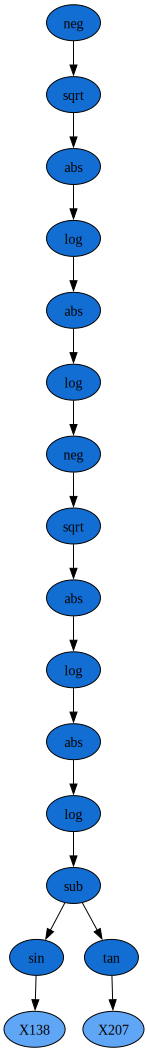

In [19]:
import graphviz
dot_data = clf._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph